In [1]:
from approximations import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pickle

In [3]:
with open('results_MSB_paramgrid_500.pkl', 'rb') as f:
    param_grid, results_msb = pickle.load(f)
    
noise_levels = np.logspace(-6, np.log(0.5), 500)

# helper functions to calculate frequencies of m1 and M1 from simulation

genotype_names_3 = []
for i in range(3):
    for j in range(2):
        for k in range(5):
            genotype_names_3.append((i,j,k))

def mutator_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 1:
            p += pop_vec[g]
    return(p)

def baseline_single_mut(genotypes_names, pop_vec):
    p = 0
    for g in range(len(genotypes_names)):
        if (genotypes_names[g][0] > 0 or genotypes_names[g][2] > 0) and genotypes_names[g][1] == 0:
            p += pop_vec[g]
    return(p)

## 1A) Comparison for pM composite functions

In [5]:
# pM functions

def Pfunction_switch(mu, tau, s):
    return(0.5 * mu * (tau-1))

def Pfunction_exact_switch(mu, tau, s):
    return(0.25*mu*(tau + np.sqrt(-(tau - 1.0)*(-16.0*mu**2*tau**3 + 48.0*mu**2*tau**2 - 48.0*mu**2*tau + 16.0*mu**2 + 16.0*s*tau - tau + 1.0)) - 1.0))

def Pfunction_highgamma(noise, mu, tau, s):
    return(1-inverse_function(noise, desai_fisher_fitness(mu, tau, s)*s, 0.5))

def Pfunction_lowgamma(noise, mu, tau, s):
    return(noise/(mu*(tau-1)))

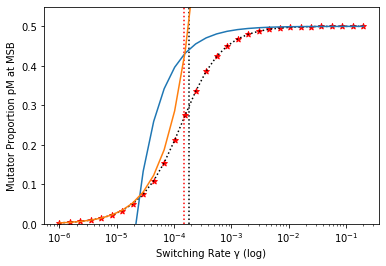

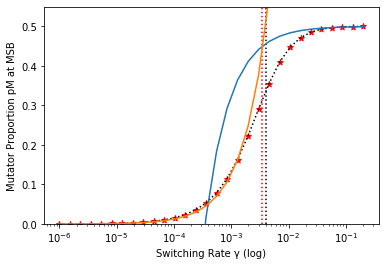

In [3]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    M0 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    pm_sim = np.array(M0) + np.array(M1)  
    
    # approximations
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    switch = Pfunction_switch(mu, tau, s)
    switch_exact = Pfunction_exact_switch(mu, tau, s)
    high_gamma = [Pfunction_highgamma(noise, mu, tau, s) for noise in noise_levels]
    low_gamma = [Pfunction_lowgamma(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, pm_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, pm_sim, marker = '*', c = 'r')
    
    ax.axvline(switch, c = 'k', linestyle = 'dotted')
    ax.axvline(switch_exact, c = 'r', linestyle = 'dotted')
    pm_approx = [P_function(noise, mu, tau, s) for noise in noise_levels]

    ax.plot(noise_levels, high_gamma, c = 'C0')
    ax.plot(noise_levels, low_gamma, c = 'C1')
    #ax.plot(noise_levels, pm_approx, c = 'b')
    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Mutator Proportion pM at MSB')
    ax.set_ylim(0,0.55)
    
    ax.set_xscale('log')
    
    plt.savefig('pM_composite_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg')
    
    plt.show()

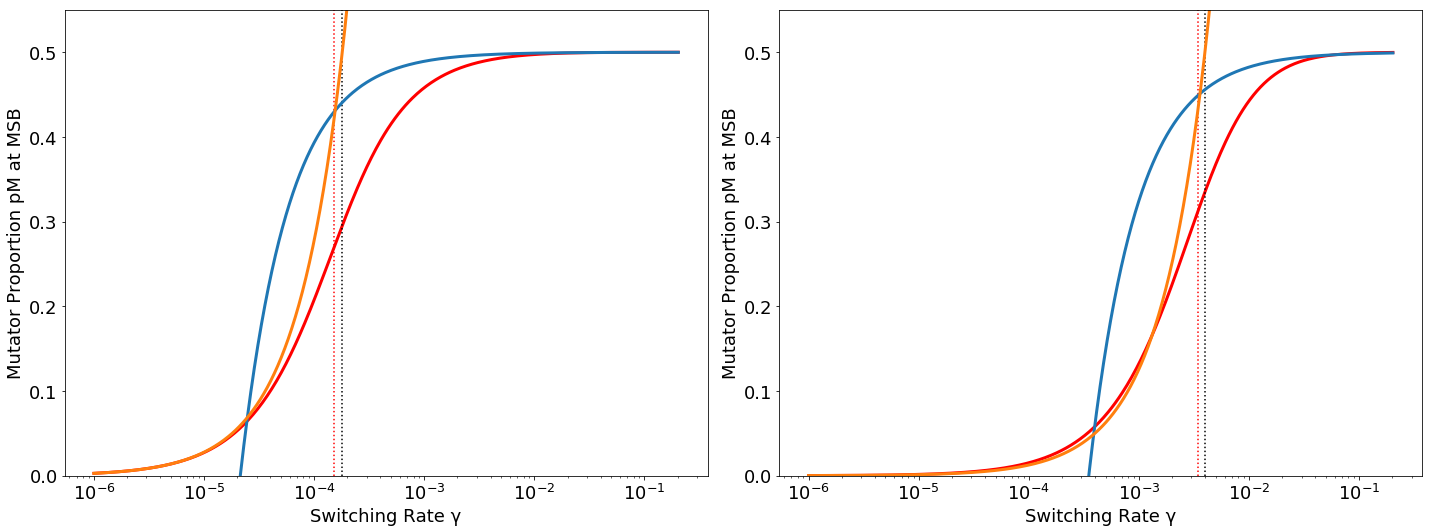

In [11]:
fig, ax = plt.subplots(1,2,figsize = (20,7.5))

plot_params = [6,8]

for n in plot_params:
    
    nind = plot_params.index(n)
    
    # from simulation 
    M0 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    pm_sim = np.array(M0) + np.array(M1)  
    
    # approximations
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    switch = Pfunction_switch(mu, tau, s)
    switch_exact = Pfunction_exact_switch(mu, tau, s)
    high_gamma = [Pfunction_highgamma(noise, mu, tau, s) for noise in noise_levels]
    low_gamma = [Pfunction_lowgamma(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    ax[nind].plot(noise_levels, pm_sim, c = 'r', linewidth = 3.)
    #ax[nind].scatter(noise_levels, pm_sim, marker = '*', c = 'r', s = 20.)
    
    ax[nind].axvline(switch, c = 'k', linestyle = 'dotted')
    ax[nind].axvline(switch_exact, c = 'r', linestyle = 'dotted')
    pm_approx = [P_function(noise, mu, tau, s) for noise in noise_levels]

    ax[nind].plot(noise_levels, high_gamma, c = 'C0', linewidth = 3.)
    ax[nind].plot(noise_levels, low_gamma, c = 'C1', linewidth = 3.)
    #ax.plot(noise_levels, pm_approx, c = 'b')
    ax[nind].set_xlabel('Switching Rate γ', fontsize = 18)
    ax[nind].set_ylabel('Mutator Proportion pM at MSB', fontsize = 18)
    ax[nind].set_ylim(0,0.55)
    ax[nind].tick_params(labelsize=18)
    
    ax[nind].set_xscale('log')

plt.tight_layout()
plt.savefig('pM_comparison_two_panel_new.jpg', dpi = 400)

## 1B) Comparison for pM whole function

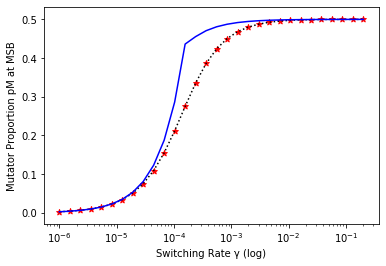

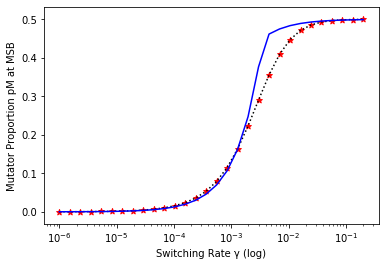

In [4]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    M0 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    pm_sim = np.array(M0) + np.array(M1)
    
    # from approximation
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    pm_approx = [P_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, pm_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, pm_sim, marker = '*', c = 'r')
    ax.set_xscale('log')
    ax.plot(noise_levels, pm_approx, c = 'b')
    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Mutator Proportion pM at MSB')
    
    plt.savefig('pM_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg')
    
    plt.show()

## 2A) Comparison for pS composite functions

In [13]:
def pS_minus(mu, tau, s):
    
    return(np.exp(-mu/s))

def pS_plus(mu, tau, s):
    
    return(np.exp(-(0.5*mu + 0.5*mu*tau) / s))

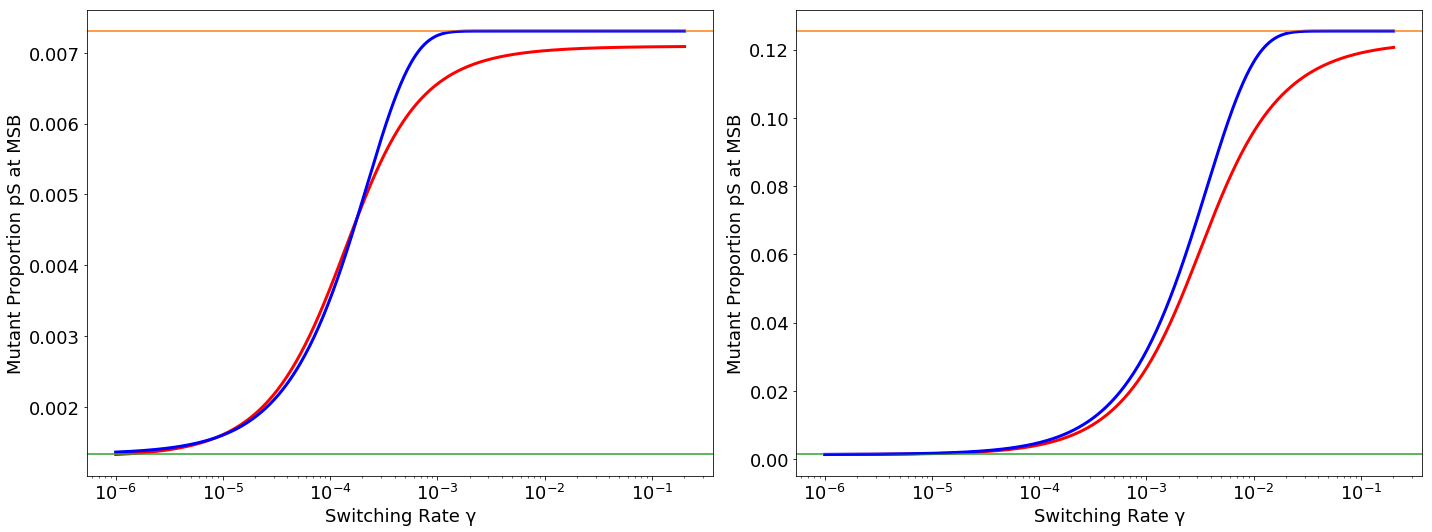

In [16]:
plot_params = [6,8]
fig, ax = plt.subplots(1,2,figsize = (20,7.5))


for n in plot_params:
    
    nind = plot_params.index(n)
    
    # from simulation 
    m1 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    ps_sim = np.array(m1) + np.array(M1)
    
    # from approximation
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    ps_approx = [1-S_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    ax[nind].plot(noise_levels, ps_sim, c = 'red', linewidth = 3.)
    #ax[nind].scatter(noise_levels, ps_sim, marker = '*', c = 'r', s = 200.)
    ax[nind].set_xscale('log')
    ax[nind].plot(noise_levels, ps_approx, c = 'b', linewidth = 3.)
    ax[nind].axhline(1-pS_minus(mu, tau, s), c = 'C2')
    ax[nind].axhline(1-pS_plus(mu, tau, s), c = 'C1')
    ax[nind].plot(noise_levels, ps_approx, c = 'b')
    ax[nind].set_xlabel('Switching Rate γ', fontsize = 18)
    ax[nind].set_ylabel('Mutant Proportion pS at MSB', fontsize = 18)
    
    ax[nind].tick_params(labelsize=18)
    
plt.tight_layout()
plt.savefig('Comparison_pS_to_panels_new.jpg' , dpi=400)

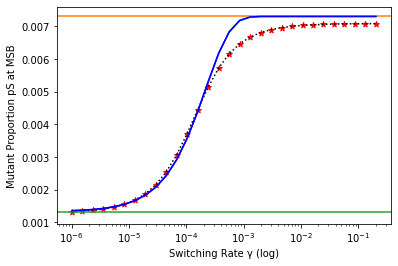

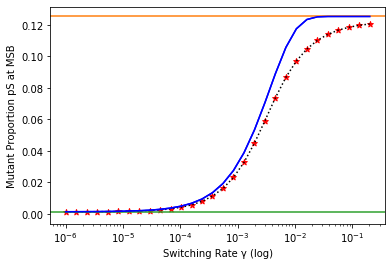

In [15]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    m1 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    ps_sim = np.array(m1) + np.array(M1)
    
    # from approximation
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    ps_approx = [1-S_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, ps_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, ps_sim, marker = '*', c = 'r')
    ax.set_xscale('log')
    ax.plot(noise_levels, ps_approx, c = 'b')
    ax.axhline(1-pS_minus(mu, tau, s), c = 'C2')
    ax.axhline(1-pS_plus(mu, tau, s), c = 'C1')
    ax.plot(noise_levels, ps_approx, c = 'b')
    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Mutant Proportion pS at MSB')
    
    plt.savefig('pS_composite_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg')
    
    plt.show()

## 2B) Comparison for pS whole function

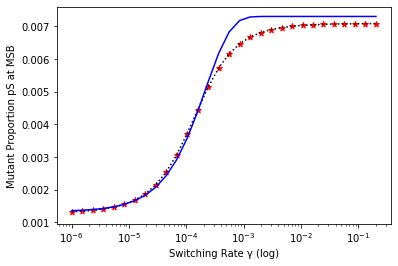

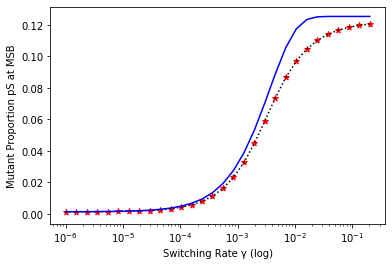

In [16]:
plot_params = [6,8]

for n in plot_params:
    
    # from simulation 
    m1 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    ps_sim = np.array(m1) + np.array(M1)
    
    # from approximation
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    ps_approx = [1-S_function(noise, mu, tau, s) for noise in noise_levels]
    
    # plotting
    fig, ax = plt.subplots()
    ax.plot(noise_levels, ps_sim, linestyle = 'dotted', c = 'k')
    ax.scatter(noise_levels, ps_sim, marker = '*', c = 'r')
    ax.set_xscale('log')
    ax.plot(noise_levels, ps_approx, c = 'b')
    ax.set_xlabel('Switching Rate γ (log)')
    ax.set_ylabel('Mutant Proportion pS at MSB')
    
    plt.savefig('pS_proportion_mu='+str(mu)+'_s='+str(s)+'_tau='+str(tau)+'.jpg')
    
    plt.show()

In [17]:
len(param_grid)

100

## Calculating R2

In [27]:
plot_params = [6,8]

for n in plot_params:
    
    mu, tau, s = param_grid[n]['mu'], param_grid[n]['tau'], param_grid[n]['s']
    
    # pM
    
    # from simulation 
    M0 = [results_msb[n][i]['pop'][5] for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    pm_sim = np.array(M0) + np.array(M1)
    
    # from approximation
    pm_approx = [P_function(noise, mu, tau, s) for noise in noise_levels]
    
    print('For mu = ' + str(mu)  + ' tau = '+ str(tau) + ' s = ' + str(s) +':')
    print('Corr R2 pM is ' + str(scipy.stats.pearsonr(np.array(pm_sim), pm_approx)[0]**2))
    
    
    # pS
    
    # from simulation 
    m1 = [baseline_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    M1 = [mutator_single_mut(genotype_names_3, results_msb[n][i]['pop']) for i in range(len(noise_levels))]
    
    ps_sim = np.array(m1) + np.array(M1)
    
    # from approximation
    ps_approx = [1-S_function(noise, mu, tau, s) for noise in noise_levels]
    
    
    print('Corr R2 pS is ' + str(scipy.stats.pearsonr(np.array(ps_sim), ps_approx)[0]**2))
    
    
    

For mu = 4.000000000000001e-05 tau = 10 s = 0.03:
Corr R2 pM is 0.9664841493098483
Corr R2 pS is 0.9959590568171972
For mu = 4.000000000000001e-05 tau = 200 s = 0.03:
Corr R2 pM is 0.9865566093376207
Corr R2 pS is 0.9938579069728302
